In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.extensions import UnitaryGate
import numpy as np

In [2]:
from qiskit.circuit.gate import Gate
from qiskit.circuit.library.standard_gates import HGate, CZGate, RYGate, XGate

class RBSGate(Gate):

    def __init__(self, label=None, param=None):
        super().__init__(name='RBS', num_qubits=2, params=[param])
        
    def _define(self):
        from qiskit.circuit.quantumregister import QuantumRegister
        from qiskit.circuit.quantumcircuit import QuantumCircuit

        q = QuantumRegister(2, 'q')
        qc = QuantumCircuit(q, name=self.name)

        rules = [
            (HGate(), [q[0]], []),
            (HGate(), [q[1]], []),
            (CZGate(), [q[0], q[1]], []),
            (RYGate(self.params[0]/2), [q[0]], []),
            (RYGate(-self.params[0]/2), [q[1]], []),
            (CZGate(), [q[0], q[1]], []),
            (HGate(), [q[0]], []),
            (HGate(), [q[1]], [])
        ]

        qc._data = rules
        self.definition = qc

In [3]:
qubit = QuantumRegister(6)
circ = QuantumCircuit (qubit)

In [4]:
#Apply X gate0,1 to 1st and 2nd qubits.
circ.append(XGate(), [qubit[0]]) 
circ.append(XGate(), [qubit[1]])

# Apply RBS gate1 to 1st and 2nd qubit
circ.append(RBSGate(param=0), [qubit[0], qubit[1]])

In [5]:
# Apply X gate2 to 3nd qubits.
circ.append(XGate(), [qubit[2]]) 
# Apply RBS gate2 to 2nd and 3rd qubit
# theta2
circ.append(RBSGate(param=0), [qubit[1], qubit[2]])

# Apply X gate3 to 4th qubits.
circ.append(XGate(), [qubit[3]]) 
# Apply RBS gate3 to 1st and 2nd qubit
# theta3
circ.append(RBSGate(param=0), [qubit[0], qubit[1]])

# Apply X gate4 to 5th qubits.
circ.append(XGate(), [qubit[4]]) 
# Apply RBS gate4 to 3rd and 4th qubit
# theta4
circ.append(RBSGate(param=0), [qubit[2], qubit[3]])

# Apply X gate5 to 6th qubits.
circ.append(XGate(), [qubit[5]]) 
# Apply RBS gate5 to 2nd and 3rd qubit
# theta5
circ.append(RBSGate(param=0), [qubit[1], qubit[2]])
# Apply RBS gate7 to 4th and 5th qubit
# theta7
circ.append(RBSGate(param=0), [qubit[3], qubit[4]])

# theta6
circ.append(RBSGate(param=0), [qubit[0], qubit[1]])
# Apply RBS gate8 to 3rd and 4th qubit
# theta8
circ.append(RBSGate(param=0), [qubit[2], qubit[3]])
# Apply RBS gate11 to 5th and 6th qubit
# theta11
circ.append(RBSGate(param=0), [qubit[4], qubit[5]])

# Apply RBS gate9 to 2nd and 3rd qubit
# theta9
circ.append(RBSGate(param=0), [qubit[1], qubit[2]])
# Apply RBS gate12 to 4th and 5th qubit
# theta12
circ.append(RBSGate(param=0), [qubit[3], qubit[4]])


# Apply RBS gate10 to 1st and 2nd qubit
# theta10
circ.append(RBSGate(param=0), [qubit[0], qubit[1]])
# Apply RBS gate13 to 3rd and 4th qubit
# theta13
circ.append(RBSGate(param=0), [qubit[2], qubit[3]])


In [6]:
# Apply RBS gate14 to 2nd and 3rd qubit
# theta14
circ.append(RBSGate(param=0), [qubit[1], qubit[2]])

# Apply RBS gate15 to 1st and 2nd qubit
# theta15
circ.append(RBSGate(param=0), [qubit[0], qubit[1]])


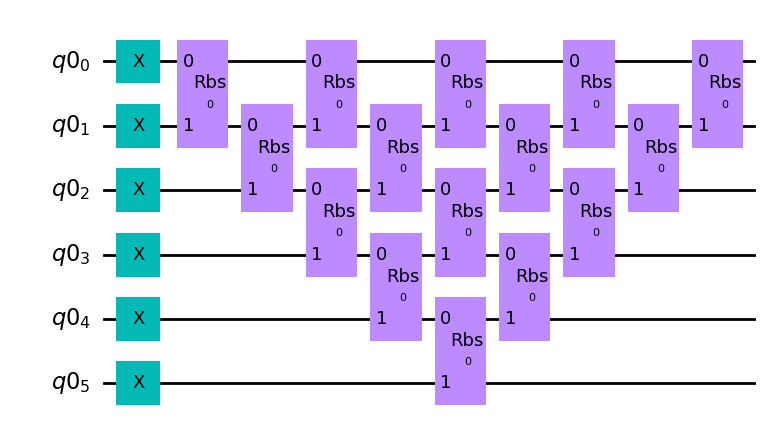

In [7]:
circ.draw(output = 'mpl')